In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy import stats
import scipy as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.image as mpimg
from io import StringIO
import seaborn as sns
mpl.style.use('ggplot')
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [42]:
#get data 
url_prefix = "https://"
df1 = pd.read_csv(url_prefix + "s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")


In [43]:
df1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [44]:
df1.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [46]:
df1["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [47]:
#balance data and downsample class 1
df1_maj = df1[df1.SEVERITYCODE==1]
df1_min = df1[df1.SEVERITYCODE==2]

df1_dsample = resample(df1_maj,
                      replace = False,
                      n_samples=58188,
                      random_state=123)

balanced_df1 = pd.concat([df1_dsample, df1_min])
balanced_df1.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [48]:
# obtaining data dimensions
for feature in ["WEATHER", "ROADCOND","LIGHTCOND"]:
    print(df1[feature].unique())

['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


In [49]:
# replace other missing values
values = {'X':df1['X'].median(), 'Y':df1['Y'].median(), 'ADDRTYPE':df1['ADDRTYPE'].mode().iloc[0], 'COLLISIONTYPE':df1['COLLISIONTYPE'].mode().iloc[0], 'JUNCTIONTYPE':df1['JUNCTIONTYPE'].mode().iloc[0], 'UNDERINFL':df1['UNDERINFL'].mode().iloc[0], 'WEATHER':df1['WEATHER'].mode().iloc[0], 'ROADCOND':df1['ROADCOND'].mode().iloc[0], 'LIGHTCOND':df1['LIGHTCOND'].mode().iloc[0]}
df1 = df1.fillna(value=values, axis=0)

In [50]:
# Drop date col
df1= df1.drop(['X','Y','INTKEY','COLDETKEY','REPORTNO','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis=1)

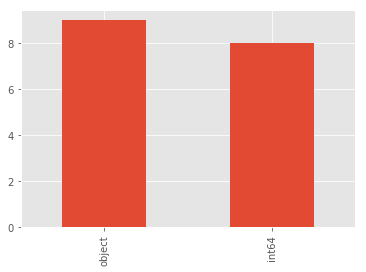

In [51]:
#bargraph to visualize dtypes 
df1.dtypes.value_counts().plot(kind='bar')

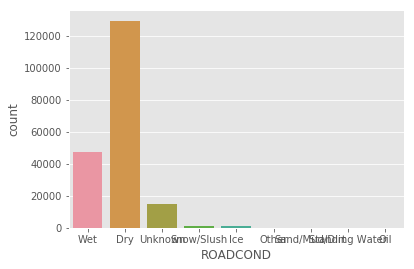

In [52]:
#visualize the objects of the columns
sns.countplot(df1['ROADCOND'], data=df1)

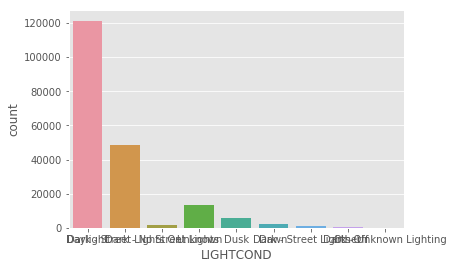

In [53]:
sns.countplot(df1['LIGHTCOND'], data=df1)

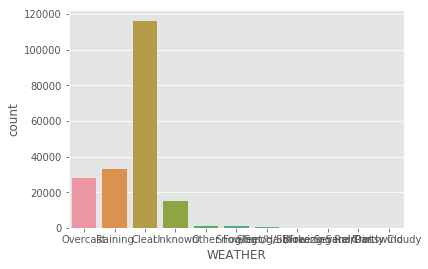

In [54]:
sns.countplot(df1['WEATHER'], data=df1)

In [55]:
#locate missing values in the data
df = df1

In [56]:
df.shape

(194673, 17)

In [57]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE      0
OBJECTID          0
INCKEY            0
STATUS            0
ADDRTYPE          0
SEVERITYCODE.1    0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
JUNCTIONTYPE      0
WEATHER           0
ROADCOND          0
dtype: int64

In [58]:
df['ST_COLCODE'] = df['ST_COLCODE'].fillna(0)
df['SEVERITYCODE'] = df['SEVERITYCODE'].fillna(0)

df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(0)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(0,'others')

df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

In [59]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE      0
OBJECTID          0
INCKEY            0
STATUS            0
ADDRTYPE          0
SEVERITYCODE.1    0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
JUNCTIONTYPE      0
WEATHER           0
ROADCOND          0
dtype: int64

In [60]:
#encoding the data
#weather
from sklearn import preprocessing
weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

#Road
from sklearn import preprocessing
roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

#light
from sklearn import preprocessing
light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])

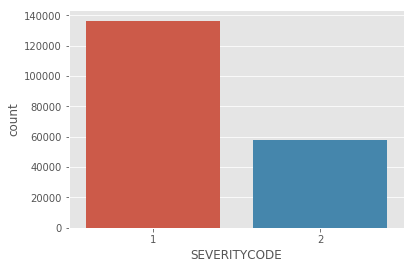

In [61]:
#exploratory data analysis
sns.countplot(df['SEVERITYCODE'], data=df)

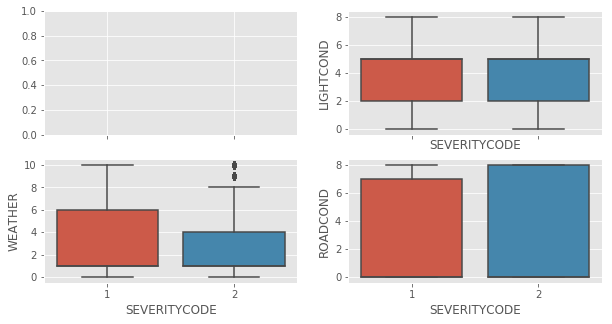

In [62]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.boxplot(ax=axes[0, 1], data=df, x='SEVERITYCODE', y='LIGHTCOND')
sns.boxplot(ax=axes[1, 0], data=df, x='SEVERITYCODE', y='WEATHER')
sns.boxplot(ax=axes[1, 1], data=df, x='SEVERITYCODE', y='ROADCOND')

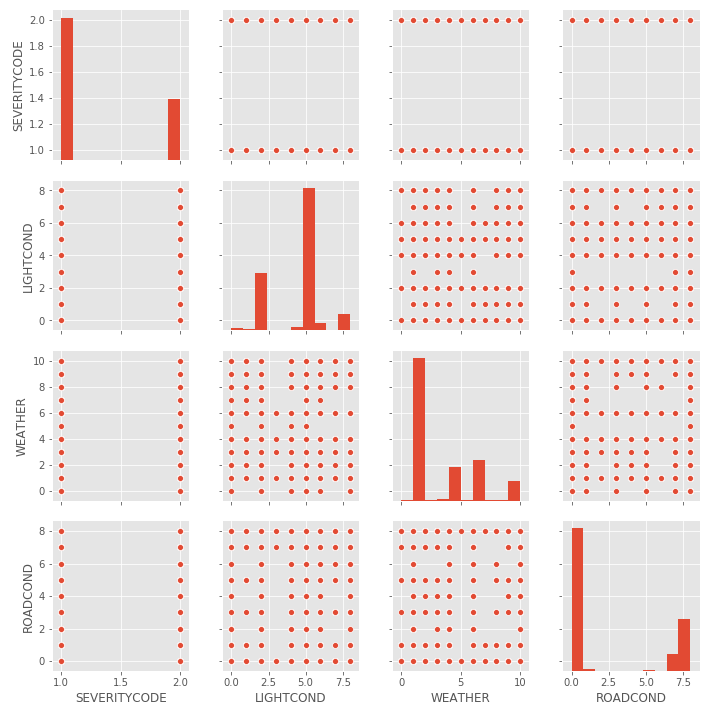

In [63]:
sns.pairplot(df[['SEVERITYCODE','LIGHTCOND','WEATHER','ROADCOND']])

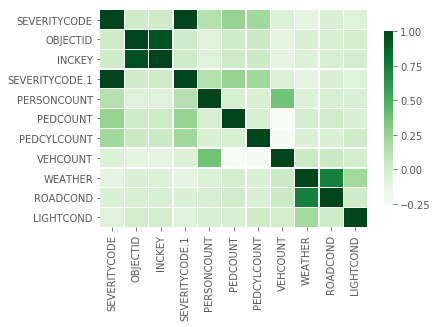

In [64]:
sns.heatmap(df.corr(),cmap="Greens", linewidth=0.3, cbar_kws={"shrink": .8})

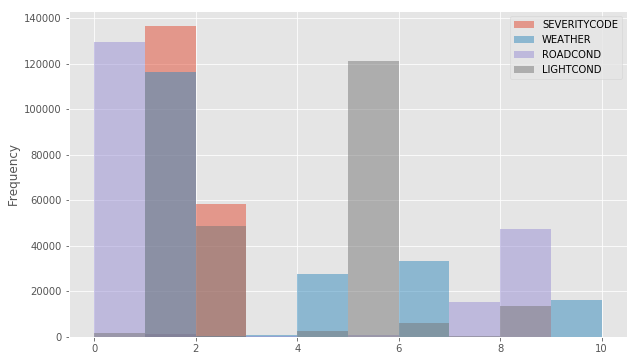

In [65]:
df[['ADDRTYPE', 'SEVERITYCODE','COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].plot(kind='hist', figsize=(10,6), alpha=0.5, stacked=False)

In [66]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

In [67]:
# Predictive Modeling & Evaluation
X = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [68]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(136271, 3)
(136271,)

Test set size
(58402, 3)
(58402,)


In [69]:
k=17
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [70]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
print('Score:',accuracy_score(knn_pred, y_test))
print('F1-Score:',f1_score(knn_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, knn_pred))

Score: 0.6949248313413924
F1-Score: 0.8185807818020752

Confusion Martix:
[[40196   895]
 [16922   389]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.98      0.82     41091
           2       0.30      0.02      0.04     17311

   micro avg       0.69      0.69      0.69     58402
   macro avg       0.50      0.50      0.43     58402
weighted avg       0.58      0.69      0.59     58402



In [72]:
from sklearn.metrics import jaccard_similarity_score, log_loss
print("Jaccard Score of KNN is :", jaccard_similarity_score(y_test, knn_pred))

Jaccard Score of KNN is : 0.6949248313413924


In [73]:
dt= DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
dt_y_pred = dt.predict(X_test)

In [75]:
jaccard_similarity_score(y_test, dt_y_pred)

0.7035204273826239

In [76]:
print('Score:',accuracy_score(dt_y_pred, y_test))
print('F1-Score:',f1_score(dt_y_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, dt_y_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, dt_y_pred))

Score: 0.7035204273826239
F1-Score: 0.825960658967323

Confusion Martix:
[[41087     4]
 [17311     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     41091
           2       0.00      0.00      0.00     17311

   micro avg       0.70      0.70      0.70     58402
   macro avg       0.35      0.50      0.41     58402
weighted avg       0.50      0.70      0.58     58402



In [77]:
#Logistic Regression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
lr_pred = lr.predict(X_test)
lr_pred

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
jaccard_similarity_score(y_test, lr_pred)

0.7035889181877333

In [80]:
print('Score:',accuracy_score(lr_pred, y_test))
print('F1-Score:',f1_score(lr_pred, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, lr_pred))
print('')
print('Classification Report:')
print (classification_report(y_test, lr_pred))

Score: 0.7035889181877333
F1-Score: 0.8260078598494366

Confusion Martix:
[[41091     0]
 [17311     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     41091
           2       0.00      0.00      0.00     17311

   micro avg       0.70      0.70      0.70     58402
   macro avg       0.35      0.50      0.41     58402
weighted avg       0.50      0.70      0.58     58402



In [81]:
knn_pred = knn.predict(X_test)
KNNJaccard = jaccard_similarity_score(y_test, knn_pred) 
KNNF1 = f1_score(knn_pred, y_test, average='weighted') 
KNNACC = accuracy_score(knn_pred, y_test)
print("Accuracy Score: %.2f" % KNNACC )
print("KNN F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

dt_y_pred = dt.predict(X_test)
DTJaccard = jaccard_similarity_score(y_test, dt_y_pred) 
DTF1 = f1_score(dt_y_pred, y_test, average='weighted') 
DTACC = accuracy_score(dt_y_pred, y_test)
print("Accuracy Score: %.2f" % DTACC)
print("Decision Tree F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

lr_pred = lr.predict(X_test)
LogRJaccard = jaccard_similarity_score(y_test, lr_pred)
LogRF1 = f1_score(lr_pred, y_test, average='weighted') 
LogACC = accuracy_score(lr_pred, y_test)
print("Accuracy Score: %.2f" % LogACC)
print("LOG F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)

Accuracy Score: 0.69
KNN F1-score: 0.80
KNN Jaccard Score: 0.69
Accuracy Score: 0.70
Decision Tree F1-score: 0.83
Decision Tree Jaccard Score: 0.70
Accuracy Score: 0.70
LOG F1-score: 0.8260
LOG Jaccard score: 0.7036


In [82]:
#  Create report
report = pd.DataFrame(data=np.array([["KNN", KNNJaccard, KNNF1, KNNACC],
                                     ["Decision Tree", DTJaccard, DTF1, DTACC],
                                    ["LogisticRegression", LogRJaccard, LogRF1, LogACC]]), columns=["Algorithm", "Jaccard", "F1-score","Accuracy"])
report = report.set_index(["Algorithm", "Jaccard", "F1-score", "Accuracy"])
report



,,,
Algorithm,Jaccard,F1-score,Accuracy
KNN,0.6949248313413924,0.8015036922197663,0.6949248313413924
Decision Tree,0.7035204273826239,0.8259040882568016,0.7035204273826239
LogisticRegression,0.7035889181877333,0.8260078598494366,0.7035889181877333
